Library Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Mount

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset=pd.read_csv('/content/drive/MyDrive/DATASET/New Dataset.csv')
dataset.head(5)

,Max,Min,STD,Kurtosis,Skewness,Class
0,2.984815,1.168864,0.147750,15.835978,-1.991657,0
1,2.884451,1.185363,0.163563,9.794411,-1.406157,0
2,2.933216,1.137018,0.173689,23.445637,-3.060911,0
3,2.940840,2.119462,0.135659,3.656691,-0.836316,0
4,2.931511,1.161739,0.130314,26.033551,-2.721046,0


In [4]:
print("Data shape:",dataset.shape)

Data shape: (537, 6)


In [5]:
dataset.isnull().sum()
print(dataset.isnull().sum())

Max         0
Min         0
STD         0
Kurtosis    0
Skewness    0
Class       0
dtype: int64


In [6]:
X = dataset.iloc[:, 0:5].values
x = dataset.iloc[:, 0:5]
y = dataset.iloc[:, 5].values
y_name = dataset.iloc[:, 5:6]
print("X shape:",X.shape)
print("y shape:",y_name.shape)

X shape: (537, 5)
y shape: (537, 1)


In [7]:
# iterating the columns 
print("Attributes:\n")
for col in x.columns: 
    print(col)

print("\n")
print("Class:")
for col in y_name.columns: 
    print(col)

Attributes:

Max
Min  
STD
Kurtosis
Skewness


Class:
Class


Co-relation Matrix (To know identify the relationship of target with attributes

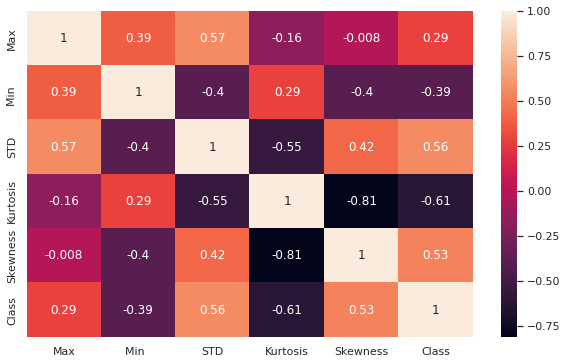

In [8]:
import seaborn as sn
import matplotlib.pyplot as plt
sn.set(font_scale=1)
sn.set_style("darkgrid")
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sn.heatmap(dataset.corr(),annot=True, ax=ax)
plt.show()

Smote Analysis

In [21]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=20)
X, y = sm.fit_resample(X, y)

In [22]:
print("X shape:",X.shape)
print("y shape:",y.shape)

X shape: (560, 5)
y shape: (560,)


Splitting (Train/Test) (70% Train, 30% Test)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

Feature Scaling (Difference between Each Attributes)

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

KNN

In [25]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors =10, metric = 'minkowski', p = 1 )

In [26]:
classifier_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10, p=1)

In [27]:
# Predicting the Test set results
y_pred_knn = classifier_knn.predict(X_test)

In [28]:
print(y_pred_knn)


[3 3 0 1 1 1 1 0 2 3 3 0 0 0 0 0 1 2 2 1 2 2 2 1 2 1 0 2 0 1 2 0 1 2 3 3 3
 3 2 0 3 2 1 2 3 1 1 2 3 1 0 2 3 2 2 0 2 1 2 2 3 0 3 3 3 1 2 2 1 0 0 0 2 0
 0 1 0 1 2 1 0 3 2 0 1 0 1 0 2 2 3 1 2 2 2 3 3 3 2 2 0 2 0 1 3 1 0 2 1 0 2
 1 1 3 3 0 1 0 2 3 2 2 2 0 3 1 0 3 1 3 2 0 1 3 1 0 1 2 1 2 3 1 3 0 3 0 0 3
 1 0 3 0 0 2 1 0 0 0 0 0 1 2 1 1 0 1 0 0]


In [29]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
print(cm_knn)

[[46  0  0  0]
 [ 1 26 11  3]
 [ 1  7 27  2]
 [ 0  9  6 29]]


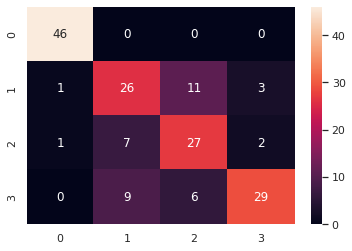

In [30]:
sn.heatmap(cm_knn, annot= True)

In [31]:

from sklearn.metrics import classification_report
print('Classification Report *Knn*')
print(classification_report(y_test, y_pred_knn))
print('\n')

Classification Report *Knn*
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        46
           1       0.62      0.63      0.63        41
           2       0.61      0.73      0.67        37
           3       0.85      0.66      0.74        44

    accuracy                           0.76       168
   macro avg       0.76      0.76      0.75       168
weighted avg       0.77      0.76      0.76       168





SVM

In [32]:
from sklearn.svm import SVC
classifier_svm= SVC (kernel='rbf',probability = True,C = 0.1, gamma = 0.01,random_state = 0)

In [33]:
# Training the SVM
classifier_svm.fit(X_train, y_train)

SVC(C=0.1, gamma=0.01, probability=True, random_state=0)

In [34]:
# Predicting the Test set results
y_pred_svm = classifier_svm.predict(X_test)

In [35]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
print(cm_svm)

[[38  0  8  0]
 [ 0  0 41  0]
 [ 1  0 36  0]
 [ 0  0 44  0]]


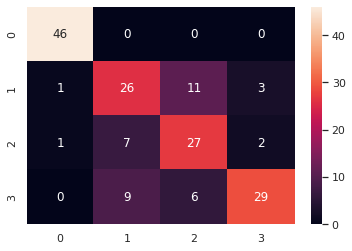

In [36]:
sn.heatmap(cm_knn, annot= True)

In [37]:
from sklearn.metrics import classification_report
print('Classification Report *svm*')
print(classification_report(y_test, y_pred_svm))
print('\n')

Classification Report *svm*
              precision    recall  f1-score   support

           0       0.97      0.83      0.89        46
           1       0.00      0.00      0.00        41
           2       0.28      0.97      0.43        37
           3       0.00      0.00      0.00        44

    accuracy                           0.44       168
   macro avg       0.31      0.45      0.33       168
weighted avg       0.33      0.44      0.34       168





/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Decision Tree (Train/Test split)


In [38]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 5,max_leaf_nodes = 11,min_samples_split = 3)

In [39]:
# Training the Decision Tree
classifier_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=11, min_samples_split=3)

In [40]:
# Predicting the Test set results
y_pred_dt = classifier_dt.predict(X_test)

In [41]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
print(cm_dt)

[[45  0  0  1]
 [ 0 11 15 15]
 [ 1  3 17 16]
 [ 0  1  3 40]]


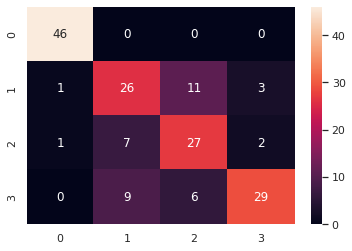

In [42]:
sn.heatmap(cm_knn, annot= True)

In [43]:
from sklearn.metrics import classification_report
print('Classification Report *dt*')
print(classification_report(y_test, y_pred_dt))
print('\n')

Classification Report *dt*
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        46
           1       0.73      0.27      0.39        41
           2       0.49      0.46      0.47        37
           3       0.56      0.91      0.69        44

    accuracy                           0.67       168
   macro avg       0.69      0.65      0.63       168
weighted avg       0.70      0.67      0.65       168





Linear Regression

In [44]:
from sklearn.linear_model import LogisticRegression
classifier_lr= LogisticRegression( fit_intercept=True,dual=False,penalty="l2",random_state=0)

In [45]:
#Training the decision tree
classifier_lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [46]:
#Predicting the test set results
y_pred_lr=classifier_lr.predict(X_test)

In [47]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
print(cm_lr)

[[46  0  0  0]
 [ 0 20 14  7]
 [ 1  4 26  6]
 [ 0  7  3 34]]


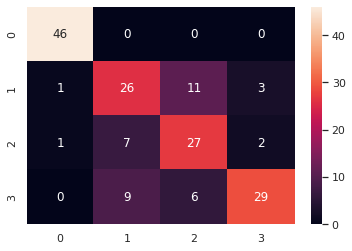

In [48]:
sn.heatmap(cm_knn, annot= True)

In [49]:
from sklearn.metrics import classification_report
print('Classification Report *lr*')
print(classification_report(y_test, y_pred_lr))
print('\n')

Classification Report *lr*
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        46
           1       0.65      0.49      0.56        41
           2       0.60      0.70      0.65        37
           3       0.72      0.77      0.75        44

    accuracy                           0.75       168
   macro avg       0.74      0.74      0.74       168
weighted avg       0.75      0.75      0.75       168





Naive Bayes

In [50]:
from sklearn.naive_bayes import GaussianNB
classifier_GaussianNB = GaussianNB(var_smoothing = 0.012328467394420659)

In [51]:
#Training the decision tree
classifier_GaussianNB.fit(X_train, y_train)

GaussianNB(var_smoothing=0.012328467394420659)

In [52]:
#Predicting the test set results
y_pred_GaussianNB=classifier_GaussianNB.predict(X_test)

In [53]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_GaussianNB = confusion_matrix(y_test, y_pred_GaussianNB)
print(cm_GaussianNB)

[[41  0  5  0]
 [ 1 31  4  5]
 [ 1 17  9 10]
 [ 0  5  4 35]]


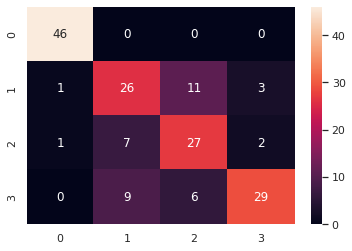

In [54]:
sn.heatmap(cm_knn, annot= True)

In [55]:
from sklearn.metrics import classification_report
print('Classification Report *GaussianNB*')
print(classification_report(y_test, y_pred_GaussianNB))
print('\n')

Classification Report *GaussianNB*
              precision    recall  f1-score   support

           0       0.95      0.89      0.92        46
           1       0.58      0.76      0.66        41
           2       0.41      0.24      0.31        37
           3       0.70      0.80      0.74        44

    accuracy                           0.69       168
   macro avg       0.66      0.67      0.66       168
weighted avg       0.68      0.69      0.68       168





Random Forest

In [106]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators=26,criterion="gini", random_state=0,min_samples_leaf=1)

In [107]:
#Training the decision tree
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=26, random_state=0)

In [108]:
#Predicting the test set results
y_pred_rf=classifier_rf.predict(X_test)

In [109]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

[[46  0  0  0]
 [ 0 27 11  3]
 [ 0  6 30  1]
 [ 0  5  2 37]]


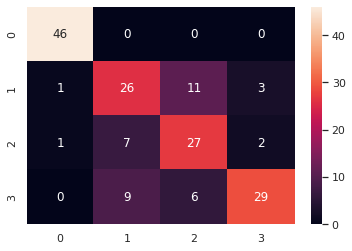

In [110]:
sn.heatmap(cm_knn, annot= True)

In [111]:
from sklearn.metrics import classification_report
print('Classification Report *rf*')
print(classification_report(y_test, y_pred_rf))
print('\n')

Classification Report *rf*
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       0.71      0.66      0.68        41
           2       0.70      0.81      0.75        37
           3       0.90      0.84      0.87        44

    accuracy                           0.83       168
   macro avg       0.83      0.83      0.83       168
weighted avg       0.84      0.83      0.83       168



